In [172]:
import numpy as np

from keras import Model
from keras.layers import Dense, Input

In [203]:
import matplotlib.pyplot as plt

In [173]:
def build_model(a, b, name):
    x = Input((a,))
    y = Dense(10, activation='sigmoid')(x)
    z = Dense(b)(y)
    model = Model(inputs=[x], outputs=[z], name=name)
    return model

In [174]:
A = build_model(1, 3, 'A')
A.trainable = False

B = build_model(3, 1, 'B')

i = Input((1,))
m = A(i)
m = B(m)

mod = Model(inputs=[i], outputs=[m])
mod.summary()
mod.compile(optimizer='adam', loss='mse')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_78 (InputLayer)        (None, 1)                 0         
_________________________________________________________________
A (Model)                    (None, 3)                 53        
_________________________________________________________________
B (Model)                    (None, 1)                 51        
Total params: 104
Trainable params: 51
Non-trainable params: 53
_________________________________________________________________


In [175]:
mod.predict([10])

array([[-0.20451012]], dtype=float32)

In [176]:
print(mod.get_layer('A').get_weights())
print()
print(mod.get_layer('B').get_weights())
print()

[array([[-0.18039078, -0.43821883, -0.3283098 , -0.1831423 , -0.66095954,
        -0.61144125, -0.40440232, -0.35407087, -0.26035115, -0.01452583]],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[-0.0737341 , -0.47648352, -0.41932598],
       [ 0.06543356, -0.12312645,  0.63595116],
       [-0.49376157, -0.15130222,  0.11273474],
       [-0.48801216, -0.6099964 , -0.5568647 ],
       [ 0.36194813,  0.36697435, -0.38099122],
       [ 0.10918492,  0.09603882, -0.59579664],
       [ 0.4038961 , -0.6569311 , -0.14683825],
       [ 0.5342624 , -0.6618434 ,  0.6736827 ],
       [ 0.4378339 , -0.33759204, -0.17968842],
       [ 0.18760598, -0.43046087,  0.06836677]], dtype=float32), array([0., 0., 0.], dtype=float32)]

[array([[ 0.1250748 , -0.31657937,  0.40125632,  0.6362145 ,  0.35800457,
        -0.01081592,  0.6300299 , -0.03897685,  0.22398704, -0.302626  ],
       [ 0.26080656,  0.10864842,  0.40446424,  0.110838  ,  0.20432347,
         0

In [177]:
x = np.linspace(-10, 10, 1000)
y = x**2

In [212]:
h = mod.fit(x, y, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 64us/step - loss: 0.0849
Epoch 2/100
1000/1000 [==============================] - 0s 34us/step - loss: 0.0856
Epoch 3/100
1000/1000 [==============================] - 0s 33us/step - loss: 0.0891
Epoch 4/100
1000/1000 [==============================] - 0s 34us/step - loss: 0.0918
Epoch 5/100
1000/1000 [==============================] - 0s 32us/step - loss: 0.0954
Epoch 6/100
1000/1000 [==============================] - 0s 38us/step - loss: 0.1103
Epoch 7/100
1000/1000 [==============================] - 0s 38us/step - loss: 0.0924
Epoch 8/100
1000/1000 [==============================] - 0s 36us/step - loss: 0.0950
Epoch 9/100
1000/1000 [==============================] - 0s 36us/step - loss: 0.0801
Epoch 10/100
1000/1000 [==============================] - 0s 38us/step - loss: 0.0801
Epoch 11/100
1000/1000 [==============================] - 0s 37us/step - loss: 0.0800
Epoch 12/100
1000/1000 [==============================] - 0s 36

1000/1000 [==============================] - 0s 37us/step - loss: 0.0412
Epoch 97/100
1000/1000 [==============================] - 0s 37us/step - loss: 0.0490
Epoch 98/100
1000/1000 [==============================] - 0s 32us/step - loss: 0.0386
Epoch 99/100
1000/1000 [==============================] - 0s 32us/step - loss: 0.0392
Epoch 100/100
1000/1000 [==============================] - 0s 32us/step - loss: 0.0388


In [185]:
print(mod.get_layer('A').get_weights())
print()
print(mod.get_layer('B').get_weights())
print()

[array([[-0.18039078, -0.43821883, -0.3283098 , -0.1831423 , -0.66095954,
        -0.61144125, -0.40440232, -0.35407087, -0.26035115, -0.01452583]],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[-0.0737341 , -0.47648352, -0.41932598],
       [ 0.06543356, -0.12312645,  0.63595116],
       [-0.49376157, -0.15130222,  0.11273474],
       [-0.48801216, -0.6099964 , -0.5568647 ],
       [ 0.36194813,  0.36697435, -0.38099122],
       [ 0.10918492,  0.09603882, -0.59579664],
       [ 0.4038961 , -0.6569311 , -0.14683825],
       [ 0.5342624 , -0.6618434 ,  0.6736827 ],
       [ 0.4378339 , -0.33759204, -0.17968842],
       [ 0.18760598, -0.43046087,  0.06836677]], dtype=float32), array([0., 0., 0.], dtype=float32)]

[array([[ 1.1973908 ,  0.3555217 ,  1.0604197 ,  1.5073467 ,  1.4811114 ,
         0.98043466,  1.75306   ,  0.7595919 ,  1.215398  ,  0.56178397],
       [-1.5052106 , -0.94442225, -0.61123127, -1.4143528 , -1.6502879 ,
        -1

In [187]:
print(mod.get_layer('A').get_weights())
print()
print(mod.get_layer('B').get_weights())
print()

[array([[ 0.06457367, -0.33152705, -0.33303407,  0.18364918, -0.30366796,
        -0.31058607, -0.3141182 , -0.32291222, -0.29398164,  0.28127453]],
      dtype=float32), array([-0.24473538,  1.8454442 ,  1.8828524 , -0.26585296, -1.8050754 ,
       -1.7819517 , -1.717557  , -1.8576797 , -1.1885173 , -0.98792905],
      dtype=float32), array([[-0.09237691, -0.49480408, -0.43823236],
       [-0.92677987,  0.80143327,  1.55563   ],
       [-1.473359  ,  0.75886476,  1.0197976 ],
       [-0.4314648 , -0.6902774 , -0.63906205],
       [ 0.71153474, -0.01439333, -0.78097904],
       [ 0.5592903 , -0.38787735, -1.093061  ],
       [ 0.8922485 , -1.1817734 , -0.6818388 ],
       [ 0.917129  , -1.0803485 ,  0.24116622],
       [ 0.59357196, -0.5330805 , -0.3858615 ],
       [ 0.50899553, -0.77358353, -0.2555279 ]], dtype=float32), array([ 0.05296218, -0.10386601, -0.08300783], dtype=float32)]

[array([[ 2.940538 ,  1.6390828,  2.3748405,  2.7925627,  3.1765974,
         2.2195399,  3.423601 , 

In [184]:
A.trainable = True
mod.compile(optimizer='adam', loss='mse')
mod.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_78 (InputLayer)        (None, 1)                 0         
_________________________________________________________________
A (Model)                    (None, 3)                 53        
_________________________________________________________________
B (Model)                    (None, 1)                 51        
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [202]:
yp = mod.predict(x).flatten()

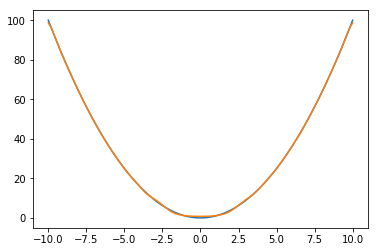

In [204]:
plt.plot(x, y)
plt.plot(x, yp)

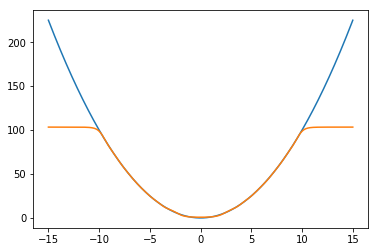

In [208]:
xx = np.linspace(-15, 15, 1000)
yy = xx**2
yyp = mod.predict(xx).flatten()

plt.plot(xx, yy)
plt.plot(xx, yyp)

In [211]:
list(mod.get_weights()[0].flatten())

[0.19916044,
 -0.3369218,
 -0.33566603,
 0.34156612,
 -0.29640207,
 -0.2974924,
 -0.31466985,
 -0.46612835,
 -0.40603632,
 0.6104217]

In [217]:
h.history['loss'][-1]

0.03879999652504921

In [220]:
h.history.keys()

dict_keys(['loss'])